## 로이터 데이터셋

1986년에 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋을 사용하겠습니다. 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋입니다. 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많습니다. 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있습니다.


[과제] 신경망 구축

데이터 벡터화

모델구성 input 10000

출력함수 softmax

epochs20으로 훈련검증 시작화 후 과대적합 지점 확인

In [3]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
train_data.shape

(8982,)

In [5]:
max(test_labels)

45

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
  return results

def vectorize_sequences_labels(sequences, dimension=46):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
  return results

# 훈련 데이터 벡터 변환
x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences_labels(train_labels)
# 테스트 데이터 벡터 변환
x_test = vectorize_sequences(test_data)
y_test = vectorize_sequences_labels(test_labels)

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


display(y_train, '크기 :',y_train.size)
print()
display(one_hot_train_labels, '크기 :',one_hot_train_labels.size)



array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

'크기 :'

413172

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

'크기 :'

413172

In [8]:
y_train==one_hot_train_labels

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [9]:


a=np.array(y_train==one_hot_train_labels)

for n,i in enumerate(a):
  for j in i:
    if j==False:
      print("False")


In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 66ms/step - loss: 2.6903 - accuracy: 0.5251 - val_loss: 1.7951 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.4285 - accuracy: 0.7103 - val_loss: 1.3379 - val_accuracy: 0.7100
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0500 - accuracy: 0.7746 - val_loss: 1.1492 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.8302 - accuracy: 0.8212 - val_loss: 1.0518 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6615 - accuracy: 0.8614 - val_loss: 0.9724 - val_accuracy: 0.7960
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5296 - accuracy: 0.8899 - val_loss: 0.9348 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4243 - accuracy: 0.9127 - val_loss: 0.9019 - val_accuracy: 0.8060
Epoch 8/20
16

In [14]:
history_dict = history.history
print(history_dict.keys())
print(history_dict.values())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
dict_values([[2.690260887145996, 1.4285149574279785, 1.0500391721725464, 0.8302002549171448, 0.6614732146263123, 0.5295761227607727, 0.42427465319633484, 0.34656062722206116, 0.285991907119751, 0.24126535654067993, 0.21061941981315613, 0.18552424013614655, 0.1686103790998459, 0.1523975282907486, 0.141667440533638, 0.1306145191192627, 0.12501272559165955, 0.11954271793365479, 0.11622274667024612, 0.11034631729125977], [0.5250563621520996, 0.7103483080863953, 0.7746179103851318, 0.821222722530365, 0.8614382147789001, 0.889877200126648, 0.9126785397529602, 0.9247055649757385, 0.9386118650436401, 0.9422450661659241, 0.9480080008506775, 0.9521422982215881, 0.952267587184906, 0.9531445503234863, 0.9541468024253845, 0.9561513662338257, 0.957278847694397, 0.9562765955924988, 0.9569030404090881, 0.9587822556495667], [1.7950984239578247, 1.3379489183425903, 1.149162769317627, 1.051760196685791, 0.9723699688911438, 0.9347659945487976, 0.

In [15]:
history.history

{'accuracy': [0.5250563621520996,
  0.7103483080863953,
  0.7746179103851318,
  0.821222722530365,
  0.8614382147789001,
  0.889877200126648,
  0.9126785397529602,
  0.9247055649757385,
  0.9386118650436401,
  0.9422450661659241,
  0.9480080008506775,
  0.9521422982215881,
  0.952267587184906,
  0.9531445503234863,
  0.9541468024253845,
  0.9561513662338257,
  0.957278847694397,
  0.9562765955924988,
  0.9569030404090881,
  0.9587822556495667],
 'loss': [2.690260887145996,
  1.4285149574279785,
  1.0500391721725464,
  0.8302002549171448,
  0.6614732146263123,
  0.5295761227607727,
  0.42427465319633484,
  0.34656062722206116,
  0.285991907119751,
  0.24126535654067993,
  0.21061941981315613,
  0.18552424013614655,
  0.1686103790998459,
  0.1523975282907486,
  0.141667440533638,
  0.1306145191192627,
  0.12501272559165955,
  0.11954271793365479,
  0.11622274667024612,
  0.11034631729125977],
 'val_accuracy': [0.6449999809265137,
  0.7099999785423279,
  0.7519999742507935,
  0.7739999890

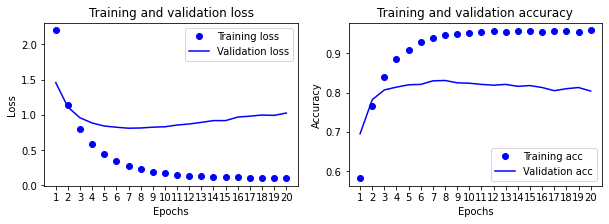

In [60]:
import matplotlib.pyplot as plt
history_dict = history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xticks(np.arange(1,21))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(122)
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xticks(np.arange(1,21))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.2104 - accuracy: 0.7903


[과제] 유닛수를 32개, 128개로 조정하고 한개의 은닉층을 세 개의 은닉층으로 변경하여 학습 및 평가 수행한 후 그 차이를 논하세요.

유닛 : 32
71/71 [==============================] - 0s 3ms/step - loss: 1.0973 - accuracy: 0.7890
점수 : 0.7889581322669983


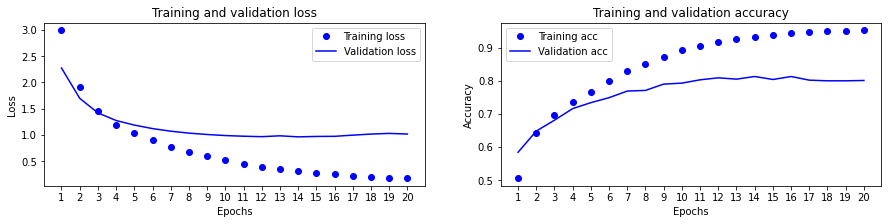



유닛 : 64
71/71 [==============================] - 0s 4ms/step - loss: 1.2979 - accuracy: 0.7796
점수 : 0.7796081900596619


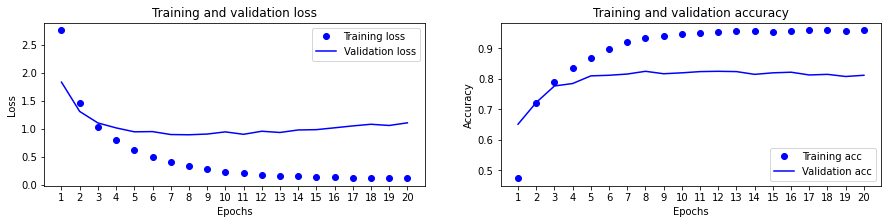



유닛 : 128
71/71 [==============================] - 0s 5ms/step - loss: 1.2651 - accuracy: 0.7894
점수 : 0.7894033789634705


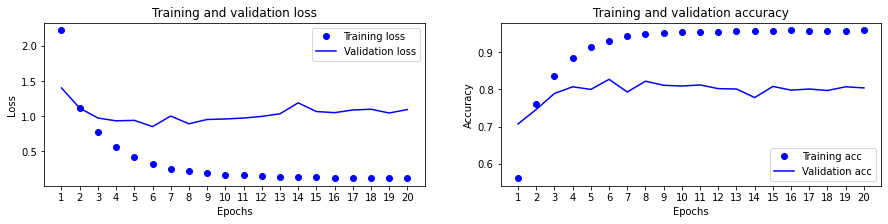

In [54]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt
unit=[32,64,128]
for i in unit:
  model = models.Sequential() #기존 은닉층 2개
  model.add(layers.Dense(i, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(i, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  x_val = x_train[:1000]
  partial_x_train = x_train[1000:]

  y_val = y_train[:1000]
  partial_y_train = y_train[1000:]
  history = model.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val),verbose=False)
  print('유닛 :',i)
  print('점수 :',model.evaluate(x_test, y_test)[1])
  history_dict = history.history
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(15,3))
  plt.subplot(121)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xticks(np.arange(1,21))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()


  plt.subplot(122)
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xticks(np.arange(1,21))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()
  
  print()
  print()


유닛 : 32
71/71 [==============================] - 0s 3ms/step - loss: 0.9432 - accuracy: 0.7952
점수 : 0.7951914668083191


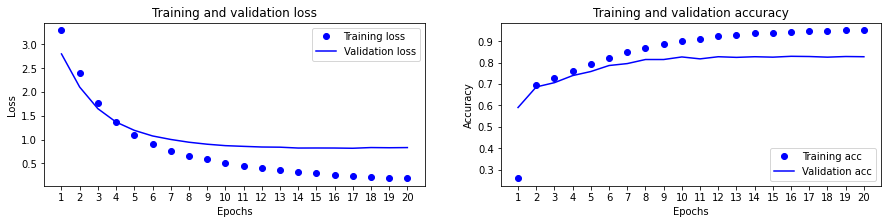



유닛 : 64
71/71 [==============================] - 0s 4ms/step - loss: 1.0640 - accuracy: 0.7965
점수 : 0.7965271472930908


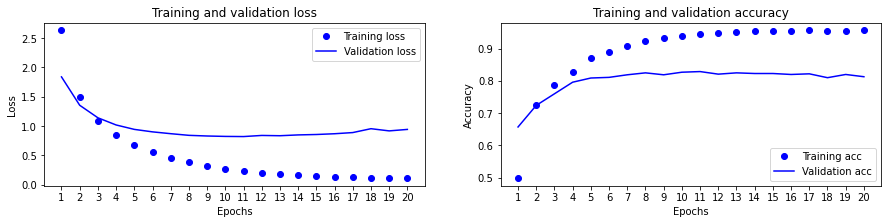



유닛 : 128
71/71 [==============================] - 0s 5ms/step - loss: 1.1831 - accuracy: 0.7903
점수 : 0.7902938723564148


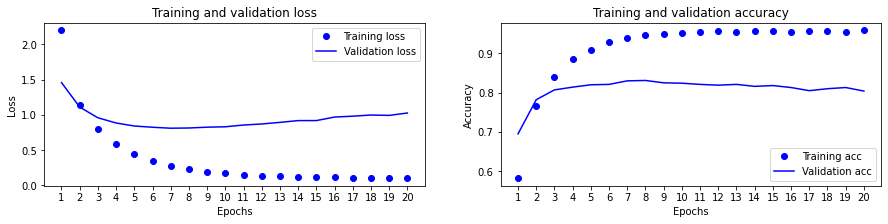

In [59]:
from keras import models
from keras import layers
unit=[32,64,128]
for i in unit:
  model = models.Sequential() #은닉층1개
  model.add(layers.Dense(i, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(46, activation='softmax'))
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  x_val = x_train[:1000]
  partial_x_train = x_train[1000:]

  y_val = y_train[:1000]
  partial_y_train = y_train[1000:]
  history = model.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val),verbose=False)
  print('유닛 :',i)
  print('점수 :',model.evaluate(x_test, y_test)[1])
  history_dict = history.history
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(15,3))
  plt.subplot(121)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xticks(np.arange(1,21))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()


  plt.subplot(122)
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xticks(np.arange(1,21))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()
  
  print()
  print()


유닛 : 32
71/71 [==============================] - 0s 3ms/step - loss: 1.3774 - accuracy: 0.7529
점수 : 0.7528940439224243


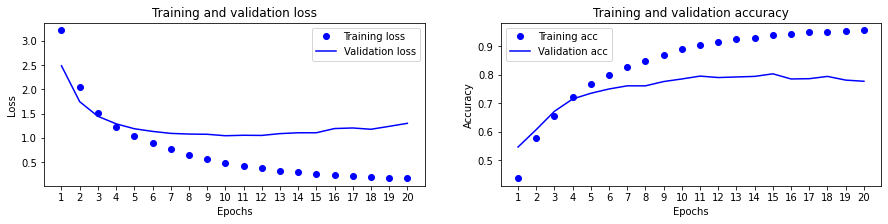



유닛 : 64
71/71 [==============================] - 0s 4ms/step - loss: 1.3597 - accuracy: 0.7743
점수 : 0.7742653489112854


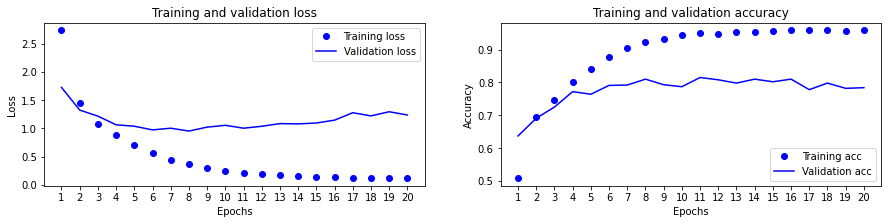



유닛 : 128
71/71 [==============================] - 0s 5ms/step - loss: 1.3998 - accuracy: 0.7765
점수 : 0.7764915227890015


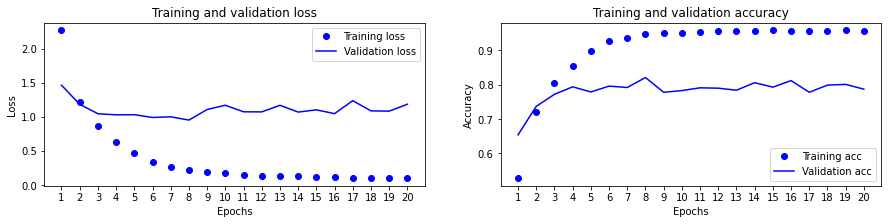

In [58]:
from keras import models
from keras import layers
unit=[32,64,128]
for i in unit:
  model = models.Sequential() #은닉층3개
  model.add(layers.Dense(i, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(i, activation='relu'))
  model.add(layers.Dense(i, activation='relu'))
  model.add(layers.Dense(46, activation='softmax'))
  model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

  x_val = x_train[:1000]
  partial_x_train = x_train[1000:]

  y_val = y_train[:1000]
  partial_y_train = y_train[1000:]
  history = model.fit(partial_x_train,
                      partial_y_train,
                      epochs=20,
                      batch_size=512,
                      validation_data=(x_val, y_val),verbose=False)
  print('유닛 :',i)
  print('점수 :',model.evaluate(x_test, y_test)[1])
  history_dict = history.history
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.figure(figsize=(15,3))
  plt.subplot(121)
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xticks(np.arange(1,21))
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()


  plt.subplot(122)
  acc = history_dict['accuracy']
  val_acc = history_dict['val_accuracy']
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xticks(np.arange(1,21))
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()
  
  print()
  print()
